<a href="https://colab.research.google.com/github/Avit-hodibu/Covid-19-Corona-Website/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Enginnering: the process of using domain knowledge to extract features from raw data.

- use to improve the performance of ML algo

# Feature Transformation
changing data cols into another form so it can perform well training

## missing value imputation
- miss value is a problem in dataset because sklearn donot accept missing value while training

So, we have two option:
> either to remove missing value

> or, to fill in the missing value

If less value is missing you can remove the dataset

If many values are missing then you can fill in using mean median and for cate can use most frequent value


## Handling Categorical Values
sklearn only understand numerical data so, if the data is in str categorical then we need to convert into numerical

we use one-hot code method

Encoding categorical data

Categorical are of two types
1. nominal
2. ordinal

#### Nominal data:
categories donot have relationship or order with each other. for eg: state,

for nominal data use one-hot encoding


One-hot encoding: Nominal categories col is seperated and make new col in name of that group category.

If a data comes under that group category they will have 1 in that col otherwise 0.

if you have 100 category in a col then it will make 100 new col for each category


Multi collinearity happen when using dummies variable.


multi collinearity = you cannot have mathmatical relationship or inter dependency between in input cols

For that we always remove 1  first col.
n give n-1 col. for eg: if there is 4 category in col then it makes 3 new col

Imagine there are 3 cate:
    
I B   R

Y 0   0

B 1   0

R 0   1

from this we make 2 col for 3 cate. If B 0 and R 0 that means Y 1 . this how it works. This slove multicollinearity problem.

OHE using frequent variable: we make single col for each cate which occurs most frequently and for  other least occuring cate we make other cate col.
this method can reduce dim.


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/cars.csv')
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [ ]:
df.brand.value_counts()

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


In [ ]:
df['fuel'].value_counts()

,count
fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


In [ ]:
df['owner'].value_counts()

,count
owner,
First Owner,5289
Second Owner,2105
Third Owner,555
Fourth & Above Owner,174
Test Drive Car,5


In [ ]:
# OHE using pandas
# since brand has many cate which will create many cate col
# right now, we only do OHE in fuel and owner
pd.get_dummies(df, columns=['fuel', 'owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


In [ ]:
# to slove multi collinearity
#K-1 OHE
pd.get_dummies(df, columns=['fuel', 'owner'], drop_first=True)
# now its 10 col, fuel_CNG and owner_First Owner cols are remove

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


when doing ML we donot use this because pandas doesnot remember where did he put the col. So each time we run col is place at different place

So, we use sklearn OHE for ML because it remember everything


In [ ]:
# OHE using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], df.iloc[:,-1], test_size=0.2, random_state=2)
X_train.head()


,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# multi colinerarity
#ohe=OneHotEncoder()

# this will remove multi colinearity by removing first col of each
#ohe=OneHotEncoder(drop='first')

# if we do sparse = false the it will automatically in array
# no need to convert into array from sparse matrix
ohe=OneHotEncoder(drop='first', sparse=False, dtype=np.int32)

# it was in parser  matrix so we need to convert to array
#X_train_new= ohe.fit_transform(X_train[['fuel', 'owner']]).toarray()

#spare false
X_train_new= ohe.fit_transform(X_train[['fuel', 'owner']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# spare to array
#X_test_new=ohe.transform(X_test[['fuel', 'owner']]).toarray()

#spare false
X_test_new=ohe.transform(X_test[['fuel', 'owner']])

In [ ]:
# now we need to combine col brand, km_driven and the X_test_new
# converting pd df to array
np.hstack((X_train[['brand', 'km_driven']].values, X_train_new)).shape

(6502, 9)

In [ ]:
#OHE with top cate(frequent)
counts=df['brand'].value_counts()
counts

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


In [ ]:
df['brand'].nunique()

32

In [ ]:
threshold=100
#storing the brands which is equal to 100 or more cars
repl = counts[counts <= threshold].index

In [ ]:
# for other we use uncommon
pd.get_dummies(df['brand'].replace(repl, 'uncommon'))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,True,False,False,False,False,False,False,False,False
8124,False,False,False,False,True,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,True,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,True,False,False,False


#### Ordinal data
there is relationship or order between data. For eg: division

for ordinal data use ordinal encoding

Ordinal encodeing is use for ordinal input data

##### Ordinal encoding
If col is cate and also is in input col than we use ordinal encoding

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/customer.csv')
df.sample(5)

,age,gender,review,education,purchased
42,30,Female,Good,PG,Yes
34,86,Male,Average,School,No
2,70,Female,Good,PG,No
24,16,Female,Average,PG,Yes
17,22,Female,Poor,UG,Yes


In [ ]:
# we see gender(nominal), review(ordinal), education(ordinal), purchased(nominal) are categorical col
# in gender one hot encoding, review and education odinal encoding, and purchased label encoding

df=df.iloc[:,2:]
df.head()


,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.2)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# placing each col cate in list in ascending oder
oe=OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
oe.fit(X_train)
X_train=oe.transform(X_train)
#model is ready by X_train data. so, just need to transfrom for X_test
X_test=oe.transform(X_test)

In [ ]:
X_train.shape

(40, 2)

In [ ]:
# it is array
X_train

array([[0., 2.],
       [2., 2.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 2.],
       [0., 0.],
       [0., 2.],
       [0., 0.],
       [2., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [2., 0.],
       [2., 2.],
       [0., 2.],
       [2., 1.],
       [0., 1.],
       [2., 0.],
       [1., 2.],
       [2., 1.],
       [0., 0.],
       [2., 2.],
       [2., 0.],
       [1., 1.],
       [2., 1.],
       [0., 2.],
       [1., 1.],
       [1., 0.],
       [0., 2.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [2., 2.],
       [2., 2.]])

In [ ]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

##### Label encoding
If the data col is ordinal categorical data and also target col or ouput col then we need to use label encoding for that target **data**
This is use for output label

In [ ]:
y_train.head()

,purchased
27,No
33,Yes
5,Yes
12,No
16,Yes


In [ ]:
# since purchased col is target col or output col and this is ordinal data
# so, we need to use label encoding
from sklearn.preprocessing import LabelEncoder
# here we donot have option to decide the order like ordinal encoding
# it is automatically decide by encoder
le=LabelEncoder()

le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [ ]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
y_train

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0])

## Outlier Detection
outlier create inaccurate model so, we need to remove it before we train our model.

## Feature scaling
- technique to standardize the independent features present in the data in a fixed range
scale or range of two or more data may be different range

KNN algo works on ecludian distance so so, when we working with 2 different scale model then value col which has higher range of scale will dominate other. So, we should scale.

generally, the scale range make -1 to +1

Scaling doesnot harm the model rather in some training model aglo it increase the accuracy.

in linear regression you must do scaling

in Decision tree classifier, random forest(tree based), GBoost, XGBoost accuracy remain same before and after scaling  

Type of scaling:
1. standardization
2. Normalization

### standardization
also called Z-score Normalization

transfrom each data:
```
Xi' = Xi-mean(X)/ sigma(standard devi)
```
so, when we take mean of Xi' after transformation, mean(Xi')=0 and standard devi = 1

two thing happen now= mean centering and scaling stad devi

In [ ]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df=df.iloc[:,2:] #remove col
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df.sample(4) # random choosen dataset

,Age,EstimatedSalary,Purchased
153,36,50000,0
346,53,72000,1
69,31,68000,0
75,34,112000,1


In [ ]:
# before scaling we need to do train_test split always
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [ ]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit the scaler to train set, it will learn the parameters from X_train
scaler.fit(X_train)
#transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#we can also do fit and transform at once
#X_train_scaled=scaler.fit_transform(X_train)

scaler.mean_

array([3.7871875e+01, 7.0281250e+04])

In [ ]:
# changeing into numpy array to df
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.066752,-0.386344
1,0.797535,-1.229939
2,0.110692,1.853544
3,0.601294,-0.909955
4,1.876859,-1.288118


In [ ]:
X_train_scaled.describe().round(2)

,Age,EstimatedSalary
count,320.00,320.00
mean,-0.00,0.00
std,1.00,1.00
min,-1.95,-1.61
25%,-0.77,-0.79
50%,-0.09,0.02
75%,0.70,0.52
max,2.17,2.32


In [ ]:
X_train.describe().round(2)

,Age,EstimatedSalary
count,320.00,320.00
mean,37.87,70281.25
std,10.21,34430.55
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,71000.00
75%,45.00,88000.00
max,60.00,150000.00


#### effect of scale

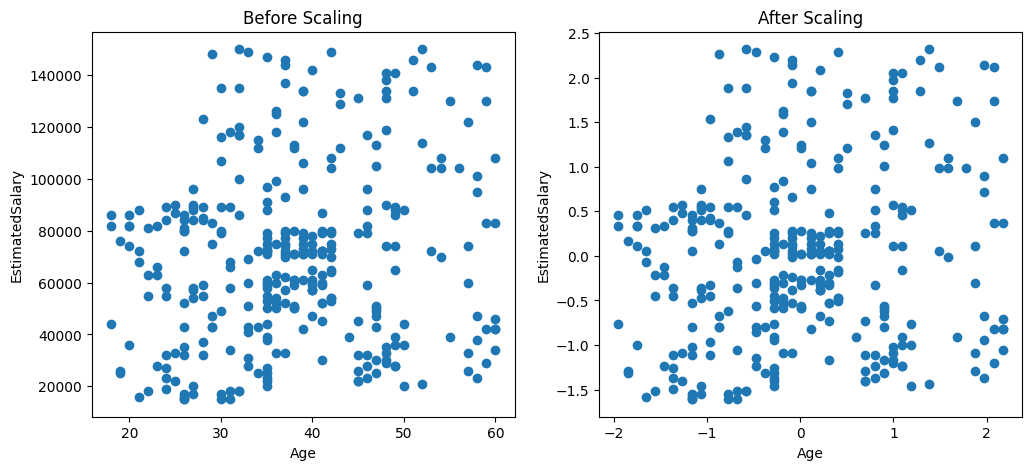

In [ ]:
# data spread doesnot change after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')
plt.show()

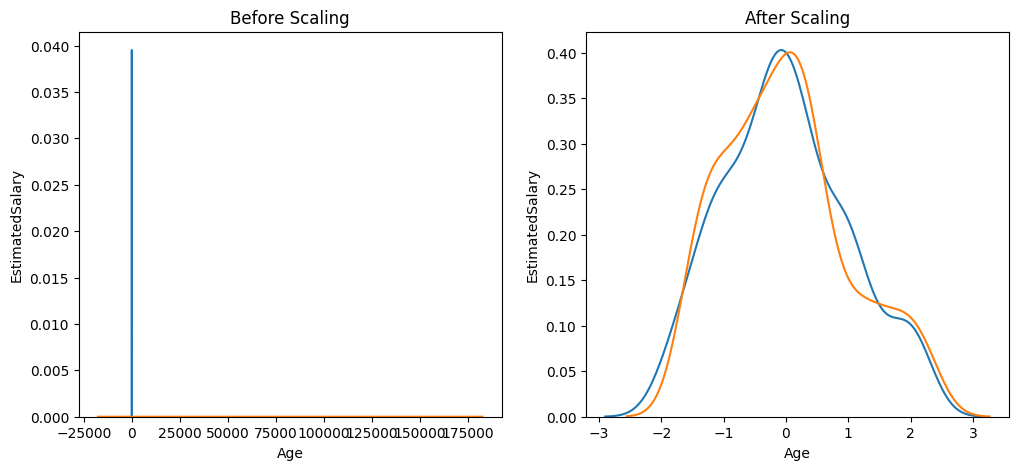

In [ ]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
#after scaling
ax2.set_title('After Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

before, age and salary are incompareable

but after, we can compare since both are in same scale

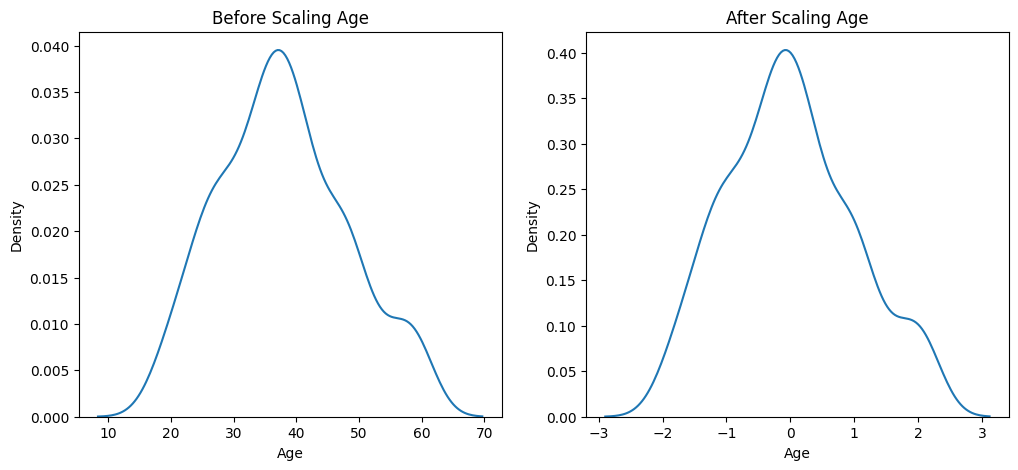

In [ ]:
# Distribution of each entity is same before and after the scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling Age')
sns.kdeplot(X_train['Age'], ax=ax1)
#after scaling
ax2.set_title('After Scaling Age')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

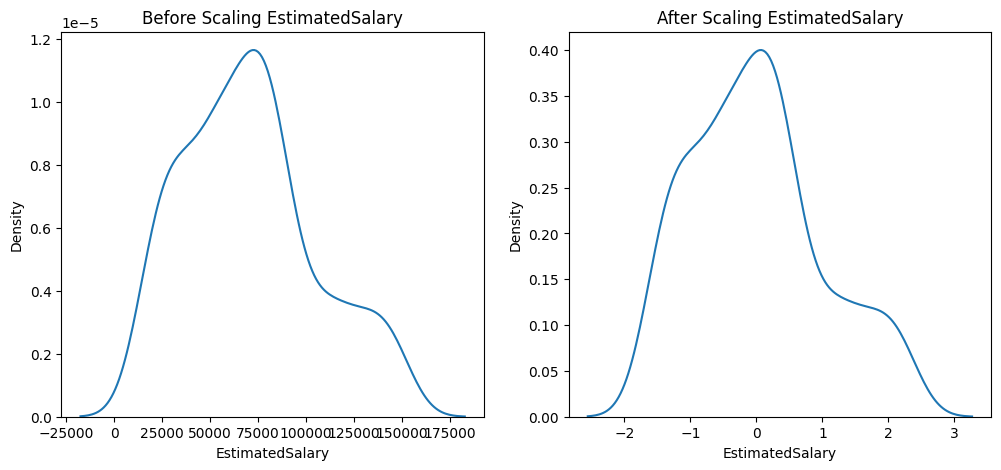

In [ ]:
# Distribution of each entity is same before and after the scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling EstimatedSalary')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
#after scaling
ax2.set_title('After Scaling EstimatedSalary')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

#### When to use standardization
1. K-Means= Use the euclidean Distance measure
2. K-Nearest-Neighbours = Measure the distance between pairs of samples and these distances are influenced by the measurement units
3. Principal Component Analysis(PCA) = try to get the feature with maximum variance
4. Artificial Neural Network  = Apply Gradient Descent
5. Gradient Descent = Theta calculation becomes faster after feature scaling and the learning rate in the update equation of Stochastic Gradient Descent is the same for every parameter

### Normalization
technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numerical col in the dataset to use common scale, without distorting differences in the range of  values or losing information.

#### MinMax Scaling
scaling formula
Xi'= (Xi - Xmin)/(Xmax-Xmin)

range will always between 0 to 1



In [ ]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# we pick only 0,1,2 col and data directly start from data since their is no header
# so, first data is data is automatically taken as head
# which we need to tell that there is no header so it see as dataset
df_norm = pd.read_csv('/content/wine_data.csv',header=None, usecols=[0,1,2])
#we add header of each selected col
df_norm.columns=['Class label', 'Alcohol', 'Malic acid']
df_norm.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

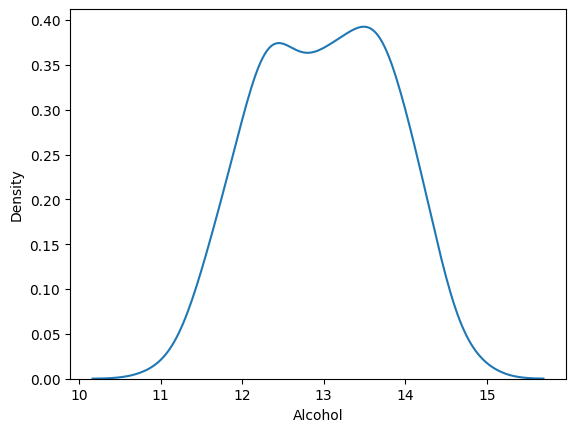

In [ ]:
sns.kdeplot(df_norm['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

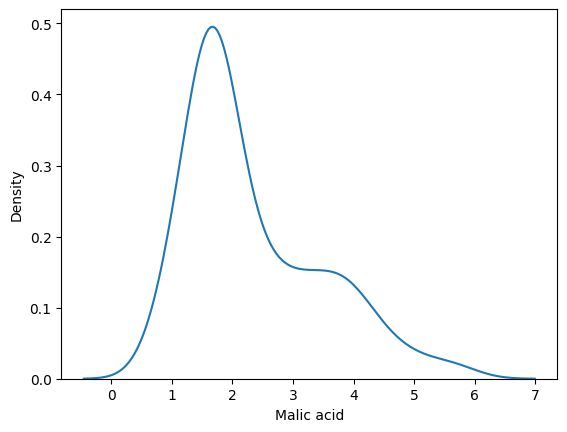

In [ ]:
sns.kdeplot(df_norm['Malic acid'])

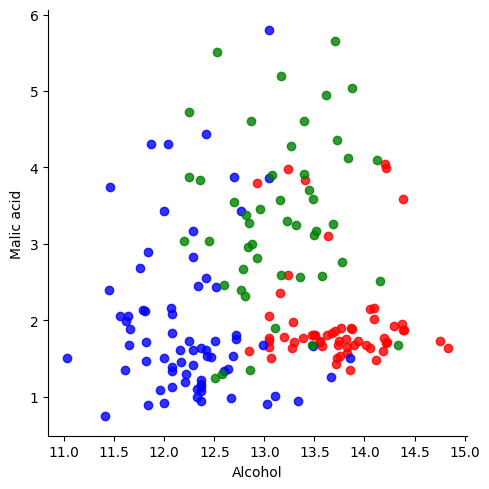

In [ ]:
color_dict = {1:'red', 2:'blue', 3:'green'}
sns.lmplot(x='Alcohol', y='Malic acid', data=df_norm, fit_reg=False, hue='Class label', legend=False, palette=color_dict)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop('Class label', axis=1), df_norm['Class label'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((142, 2), (36, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#fit
scaler.fit(X_train)
#transform
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
#numpy array to pd
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,Alcohol,Malic acid
0,0.871053,0.160896
1,0.394737,0.940937
2,0.352632,0.036660
3,0.644737,0.158859
4,0.536842,0.124236


In [ ]:
X_train_scaled.describe().round(2)

,Alcohol,Malic acid
count,142.00,142.00
mean,0.51,0.30
std,0.22,0.23
min,0.00,0.00
25%,0.34,0.15
50%,0.52,0.20
75%,0.70,0.46
max,1.00,1.00


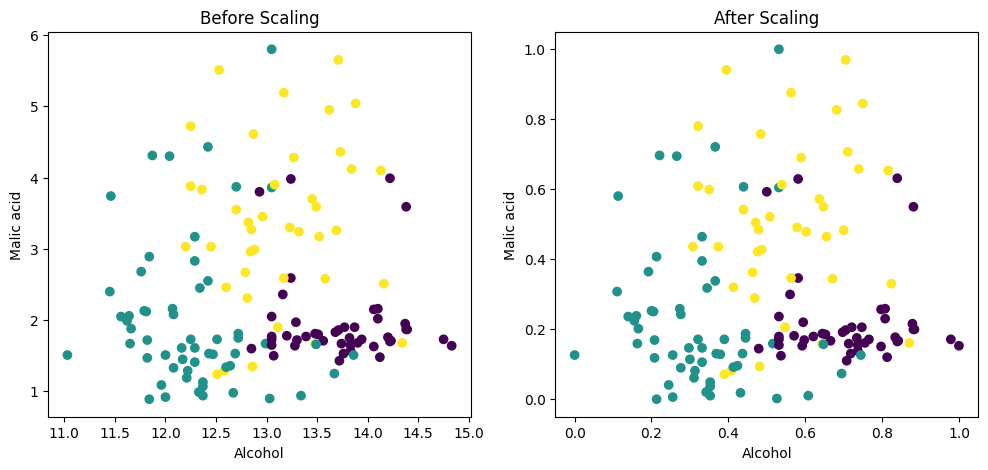

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title('Before Scaling')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title('After Scaling')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Malic acid')
plt.show()

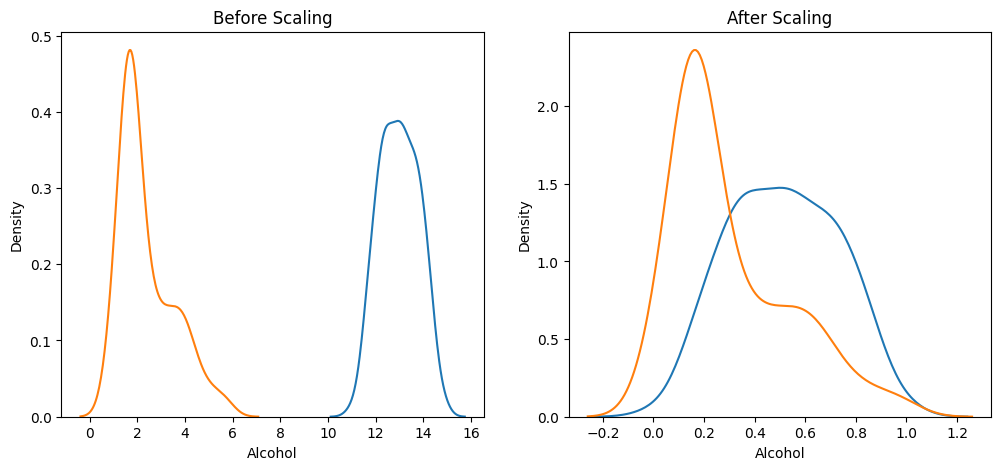

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)
#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

when you have outlier it will also squeeze so, remove the outlier forehand.

#### Mean Normalization
Xi' = Xi-Xmean/ Xmax-Xmin

we are doing mean centering

range = -1 to 1

value less than mean= -ve

value more than mean = +ve

use where you need center data


#### Max absoulte
Xi'= Xi/|Xmax|

MaxAbsScaling

sparse data = using in data where there are many zero value(input)



#### Robust scaling

Xi'= Xi - Xmedian / IQR
- Robust to outliers
If your data have lot of outliers than you should try to use this because generally it perform good.



### Standardization vs Normalization
Most of the problem perform good with Standardization

MinMax is use when you min and max of daa= use CNN img

outlier use = roboust

sparse matrix(Matrix types having most of their elements set to zero) use =max abs


## Handaling mix value


In [ ]:
## Handaling mix value
import numpy as np
import pandas as pd
df=pd.read_csv('/content/titanic.csv')
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [ ]:
# As you can see in cabin, number and ticket there is mix value
# first lets work on number
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

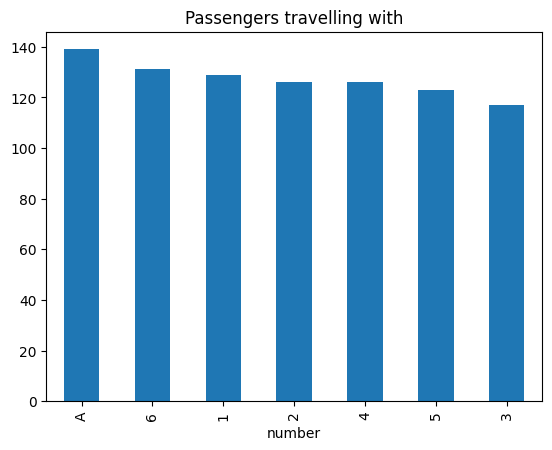

In [ ]:
fig=df['number'].value_counts().plot(kind='bar')
fig.set_title('Passengers travelling with')

In [ ]:
# extract numerical part
#This function attempts to convert the values in the number column of the DataFrame df to a numeric type.
#errors='coerce' means that any values that cannot be converted to a number will be replaced with NaN.
#downcast='integer' attempts to convert the result to the smallest possible integer type (e.g., int32, int64).
df['number_numerical']=pd.to_numeric(df['number'], errors='coerce', downcast='integer')

In [ ]:
# make a categotical col where if there is nan in 'number_numerical' col then place the value of 'number' col
# otherwise place nan
df['number_cate']=np.where(df['number_numerical'].isnull(), df['number'], np.nan)
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_cate
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [ ]:
#now cabin
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df['cabin_num']=df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat']=df['Cabin'].str[0] # capture the first letter
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_cate,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [ ]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(10)

,Cabin,Ticket,number,Survived,number_numerical,number_cate,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


## handling data and time


In [1]:
import numpy as np
import pandas as pd

date=pd.read_csv('orders.csv')
time=pd.read_csv('messages.csv')

In [2]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [3]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [5]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [6]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


**working with date**

In [7]:
# usally in df date and time is in string
# convert string to date and time so you can do transformation
#convet to datetime dtype
date['date']=pd.to_datetime(date['date'])

In [8]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [9]:
#extract year
date['date_year']=date['date'].dt.year
date.sample(5)

,date,product_id,city_id,orders,date_year
445,2019-10-14,4192,14,59,2019
474,2019-11-01,3967,2,12,2019
803,2019-11-09,5296,0,30,2019
14,2019-05-29,3833,26,240,2019
309,2019-08-14,4352,16,1,2019


In [10]:
#extract month
date['date_month_name']= date['date'].dt.month_name()
date.head()

,date,product_id,city_id,orders,date_year,date_month_name
0,2019-12-10,5628,25,3,2019,December
1,2018-08-15,3646,14,157,2018,August
2,2018-10-23,1859,25,1,2018,October
3,2019-08-17,7292,25,1,2019,August
4,2019-01-06,4344,25,3,2019,January


In [11]:
#extract days
date['date_day']=date['date'].dt.day
date.head()

,date,product_id,city_id,orders,date_year,date_month_name,date_day
0,2019-12-10,5628,25,3,2019,December,10
1,2018-08-15,3646,14,157,2018,August,15
2,2018-10-23,1859,25,1,2018,October,23
3,2019-08-17,7292,25,1,2019,August,17
4,2019-01-06,4344,25,3,2019,January,6


In [12]:
#day of week
date['date_dow_name']=date['date'].dt.day_name()
date.head()

,date,product_id,city_id,orders,date_year,date_month_name,date_day,date_dow_name
0,2019-12-10,5628,25,3,2019,December,10,Tuesday
1,2018-08-15,3646,14,157,2018,August,15,Wednesday
2,2018-10-23,1859,25,1,2018,October,23,Tuesday
3,2019-08-17,7292,25,1,2019,August,17,Saturday
4,2019-01-06,4344,25,3,2019,January,6,Sunday


In [13]:
# is weekend or not
date['date_is_weekend']=np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1, 0)
date.head()


,date,product_id,city_id,orders,date_year,date_month_name,date_day,date_dow_name,date_is_weekend
0,2019-12-10,5628,25,3,2019,December,10,Tuesday,0
1,2018-08-15,3646,14,157,2018,August,15,Wednesday,0
2,2018-10-23,1859,25,1,2018,October,23,Tuesday,0
3,2019-08-17,7292,25,1,2019,August,17,Saturday,1
4,2019-01-06,4344,25,3,2019,January,6,Sunday,1


In [15]:
# extract time elapsed between date
import datetime
today= datetime.datetime.today()
today

datetime.datetime(2024, 8, 25, 10, 59, 6, 604477)

In [20]:
time_spent = today-date['date']
time_spent

,date
0,1720 days 10:59:06.604477
1,2202 days 10:59:06.604477
2,2133 days 10:59:06.604477
3,1835 days 10:59:06.604477
4,2058 days 10:59:06.604477
...,...
995,2148 days 10:59:06.604477
996,2089 days 10:59:06.604477
997,1937 days 10:59:06.604477
998,2002 days 10:59:06.604477


In [19]:
#day passed
time_spent.dt.days

,date
0,1720
1,2202
2,2133
3,1835
4,2058
...,...
995,2148
996,2089
997,1937
998,2002


In [41]:
#month passed
time_spent.dt.days/30


,date
0,57.333333
1,73.400000
2,71.100000
3,61.166667
4,68.600000
...,...
995,71.600000
996,69.633333
997,64.566667
998,66.733333


In [31]:
time.sample(5)

,date,msg
764,2013-11-09 01:38:00,Девушки женщины пишите звоните пообщаемся встр...
109,2014-11-07 00:55:00,Зацелую мужчину до 65! Мне 34 Анна
313,2012-05-02 00:25:00,Симпатичный парень 22 ищет нескромную милашку ...
949,2013-04-17 23:59:00,ищу дев для прият встречь 0632508994
922,2012-11-11 23:14:00,Муж.50л познок.с Жен. место есть.Не спонсор.09...


In [32]:
#covert to datetime dtype
time['date']=pd.to_datetime(time['date'])

In [33]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [35]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second
time['time']= time['date'].dt.time
time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


In [36]:
#time diff
time_diff=  today - time['date']

In [37]:
#time diff in second
time_diff/np.timedelta64(1, 's')

,date
0,3.375149e+08
1,3.257687e+08
2,3.677567e+08
3,3.074489e+08
4,3.417545e+08
...,...
995,3.927245e+08
996,3.340647e+08
997,3.742393e+08
998,3.842619e+08


In [42]:
# in hours
(today - time['date'])/np.timedelta64(1,'h')

,date
0,93754.151835
1,90491.318501
2,102154.635168
3,85402.468501
4,94931.801835
...,...
995,109090.151835
996,92795.751835
997,103955.368501
998,106739.418501


##Column Tranformer
this is a technique which help to solve all feature transformer problem of all column at once.

It allows us to create and apply different transformations to specific columns of our data.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/covid_toy.csv')
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
fever,10
cough,0
city,0
has_covid,0


gender= nominal cate data

fever= numerical but 10 value is missing

cough = ordinal cate data

city = nominal cate data

if there is no 'column transformer' we need to transform each column one after another and at the end we need to use np.concatenate((colname), axis=1). this is going to be long process.

but with the column transformer we can do data once

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# we have two option for remaining col
# we can 'drop' means remove or 'passthrough' means let it remain
# while passing transformer we need to pass in tuple
transformer = ColumnTransformer(transformers=[
    ('tnf1', SimpleImputer(), ['fever']), # variable you want save, transformer you want to use, in which column
    ('tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']),
    ('tnf3', OneHotEncoder(sparse_output=False, drop='first'), ['gender', 'city'])
], remainder='passthrough')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('has_covid', axis=1), df['has_covid'], test_size=0.2, random_state=42)

In [ ]:
transformer.fit_transform(X_train).shape

(80, 7)

## Mathematical transform
applying mathematical formula in the col of data and transform

model performance increases after appyly

the distribution of data (pdf) converted to normal distribution

stats algo of ml want normal distribution data



###Function transformer:

How to find if data is normal?
- call
sns.distplot to know it is normally distributed or bot
- call pandas skewness: pd.skew() =0 is okay. if neg or pos then slew
- do QQ plot

**QQ plot** :  a graphical method for determining if a dataset follows a certain probability distribution or whether two samples of data came from the same population or not. Q-Q plots are particularly useful for assessing whether a dataset is normally distributed or if it follows some other known distribution

Quantiles are points in a dataset that divide the data into intervals containing equal probabilities or proportions of the total distribution.

Exploring distribution similarity using Q-Q plots is a fundamental task in statistics. Comparing two datasets to determine if they originate from the same distribution is vital for various analytical purposes. When the assumption of a common distribution holds, merging datasets can improve parameter estimation accuracy, such as for location and scale. Q-Q plots, short for quantile-quantile plots, offer a visual method for assessing distribution similarity. In these plots, quantiles from one dataset are plotted against quantiles from another. If the points closely align along a diagonal line, it suggests similarity between the distributions. Deviations from this diagonal line indicate differences in distribution characteristics.


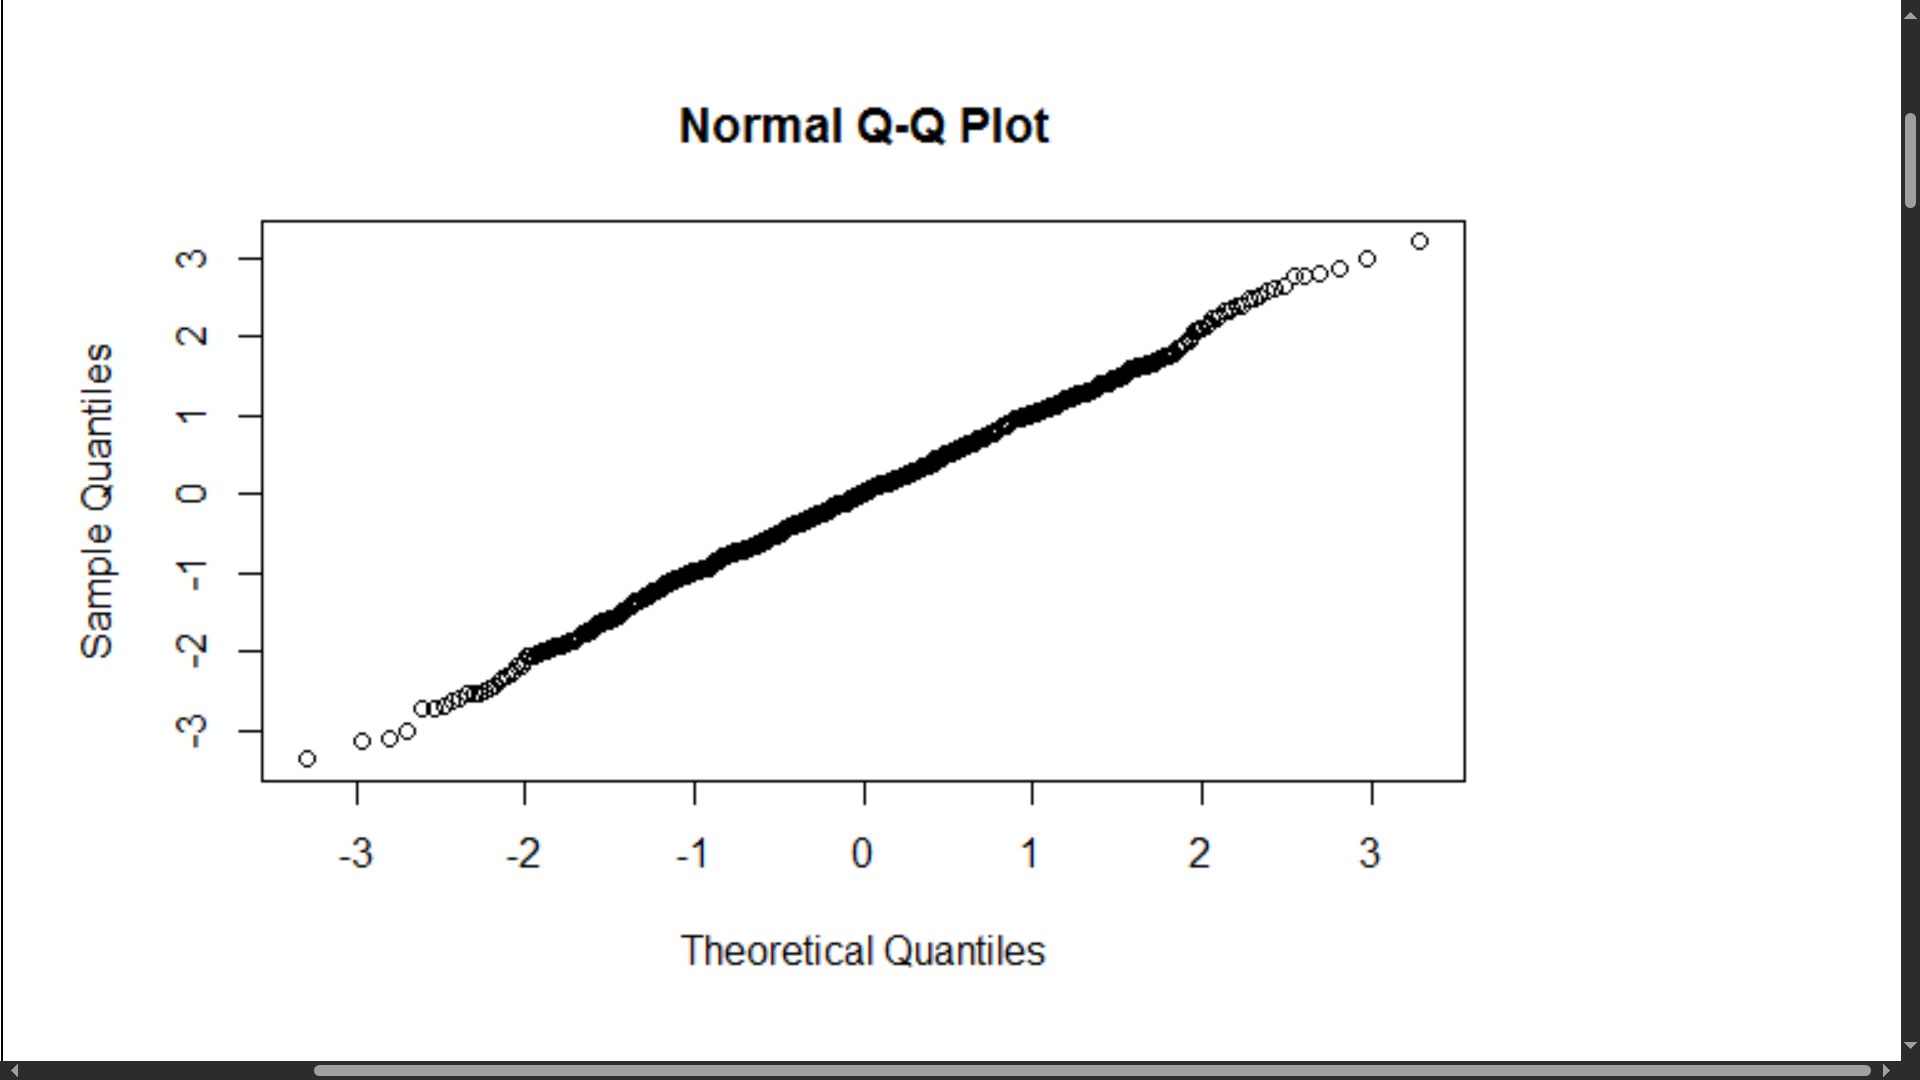

if the line is st, it is normally distributed


#### log transform
to put log transform, we take the log of each value
- by taking log tranformation the data will br normally distributed
- log transformer cannot be use in -ve value
- it is used for right skews data so, it can make in center
- all values comes in equvalent scale

#### Reciprocal tran
1/x

all big values become small and vice-versa

doesnot work with value zero


#### square and square root transform
x^2(sq) = has a moderate effect on distribution shape and it could be used to reduce left skewness.


sqrt(x) = Applied to positive values only. Hence, observe the values of column before applying.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/train.csv', usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
X =df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-9-c592f049b4f8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


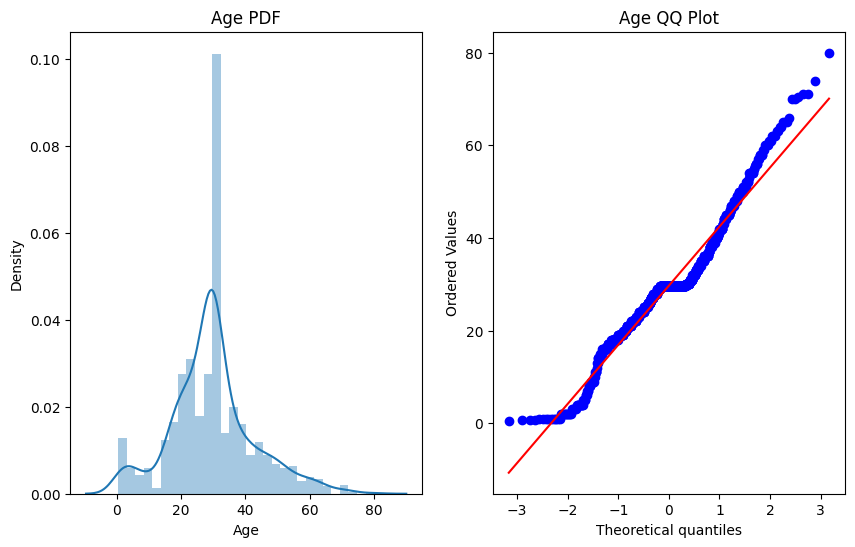

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(df['Age'], dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

<ipython-input-10-2407c2ff3e2b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


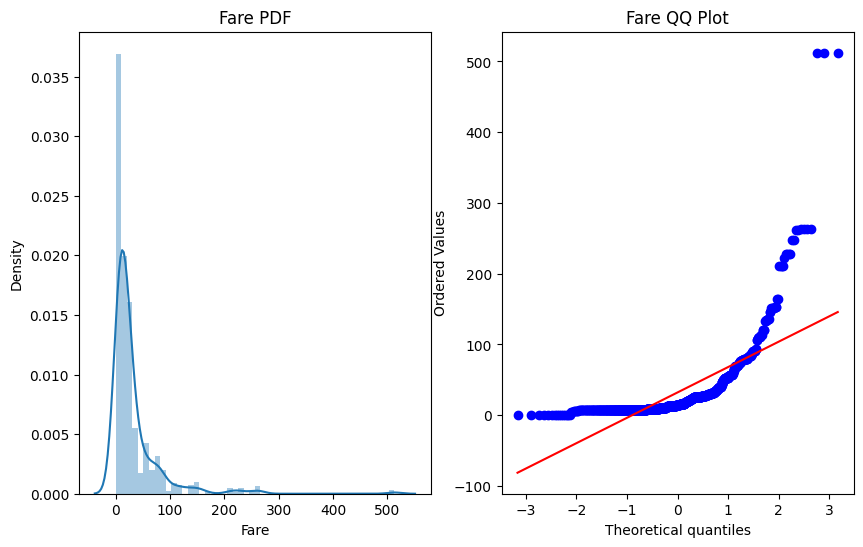

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.title('Fare PDF')
plt.subplot(122)
stats.probplot(df['Fare'], dist="norm",plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [ ]:
clf= LogisticRegression()
clf2= DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)
print('Logistic Regression accuracy',accuracy_score(y_test,y_pred))
print('Decision Tree accuracy',accuracy_score(y_test,y_pred2))

Logistic Regression accuracy 0.6480446927374302
Decision Tree accuracy 0.6759776536312849


In [ ]:
# func=log1p means add 1 in the value X so
#if x= 0 then it wont show error which in case log shows
trf = FunctionTransformer(func=np.log1p)

In [ ]:
# now lets try using func trans
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [ ]:
clf_fun = LogisticRegression()
clf2_fun = DecisionTreeClassifier()
clf_fun.fit(X_train_transformed,y_train)
clf2_fun.fit(X_train_transformed,y_train)
y_pred = clf_fun.predict(X_test_transformed)
y_pred2 = clf2_fun.predict(X_test_transformed)
print('Logistic Regression accuracy',accuracy_score(y_test,y_pred))
print('Decision Tree accuracy',accuracy_score(y_test,y_pred2))

Logistic Regression accuracy 0.6815642458100558
Decision Tree accuracy 0.6871508379888268


We can improvement. since in DT it doesnot matter but in LR it is improve after function tranformation

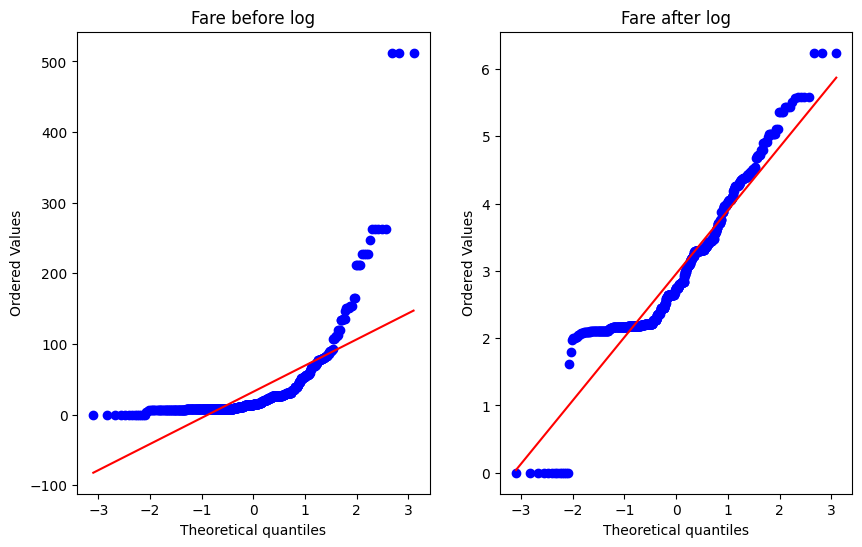

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm",plot=plt)
plt.title('Fare before log')
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm",plot=plt)
plt.title('Fare after log')
plt.show()
# since it is right skew, using log has imporved

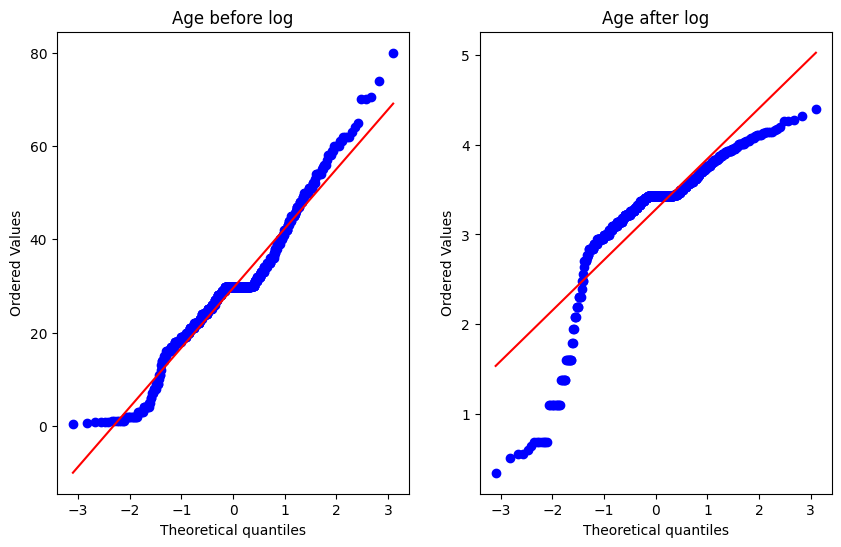

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm",plot=plt)
plt.title('Age before log')
plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm",plot=plt)
plt.title('Age after log')
plt.show()
# age was already normally distributed so, it will just make worst after log

In [ ]:
# so now let only put on fun trans log in fare only
trf2 = ColumnTransformer([
    ('fun',FunctionTransformer(func=np.log1p),['Fare'])
],remainder='passthrough')
X_train_transformed = trf2.fit_transform(X_train)
X_test_transformed = trf2.transform(X_test)
clf_fun = LogisticRegression()
clf2_fun = DecisionTreeClassifier()
y_pred = clf_fun.fit(X_train_transformed,y_train).predict(X_test_transformed)
y_pred2 = clf2_fun.fit(X_train_transformed,y_train).predict(X_test_transformed)
print('Logistic Regression accuracy',accuracy_score(y_test,y_pred))
print('Decision Tree accuracy',accuracy_score(y_test,y_pred2))

Logistic Regression accuracy 0.6703910614525139
Decision Tree accuracy 0.659217877094972


#### Custom transform

In [ ]:
def apply_transform(transform):
  X = df.iloc[:, 1:3]
  y = df.iloc[:, 0]
  trf = ColumnTransformer([
      ('log', FunctionTransformer(transform),['Fare'])
  ],remainder='passthrough')
  X_trans = trf.fit_transform(X)
  clf = LogisticRegression()
  print("Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))
  plt.figure(figsize=(10,6))
  plt.subplot(121)
  stats.probplot(X['Fare'], dist="norm",plot=plt)
  plt.title('Fare before Transform')
  plt.subplot(122)
  stats.probplot(X_trans[:,0], dist="norm",plot=plt)
  plt.title('Fare after Transform')
  plt.show()

Accuracy 0.6589013732833957


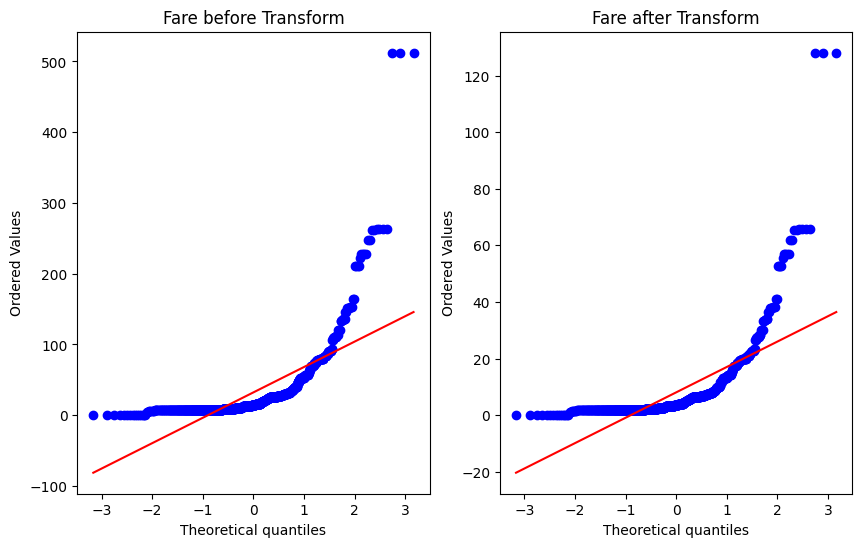

In [ ]:
apply_transform(lambda x: x**1/4)

### power transform



**Box-Cox transform**

Xipower(lambda)= { (xipower(lambda)  - 1 )/ lambda if lambda not = 0, ln(xi) if lambda=0,}

the exponent here is a variable called lambda that varies over the range of -5 to 5, and in the process of searching, we examine all values of lambda. Finally, we choose the optimal value (resulting in the best approx to a normal distribution) for your variable.

thr optimal parameter for stabilizing variance and minimizing skewness is estimated through
1. max likelyhood or,
2. bayesian

by default, unit-variance normalization to the transformed output


This transform is applicable only number greater than zero (n>0)

to solve this yeo-johson is created


**yeo-johnson transform**
it an adjustment to the box -xox tranformation, by which we can apply it to negetive number
https://miro.medium.com/v2/0*Bht6xgGpXIe7TSQA.png

1. use power transformation class
2. try both transformation



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df= pd.read_csv('/content/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [ ]:
df.describe()
# as we can see min is zero in some col that means there is 0 in value

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
X=df.drop(columns=['Strength'])
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# applying regression without transformation
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.627553179231485

In [ ]:
# cross checking with cross val score
lr=LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628606

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


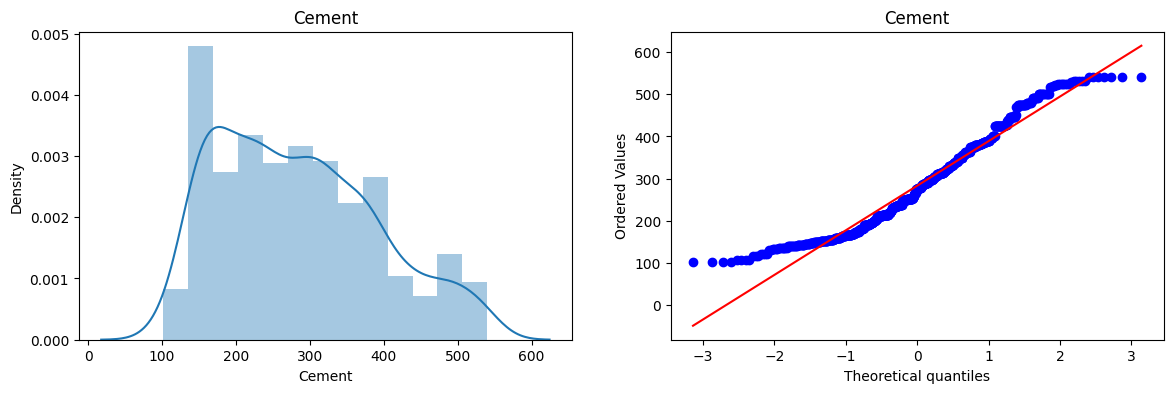

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


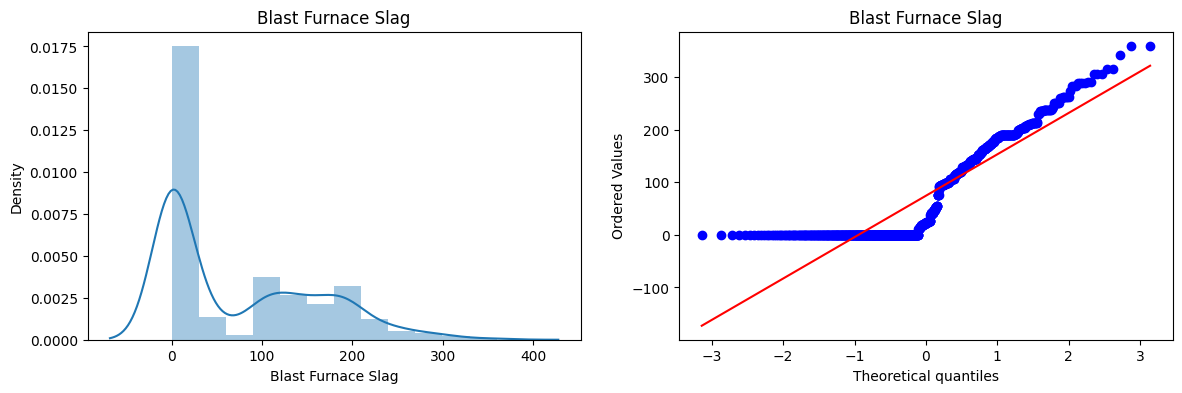

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


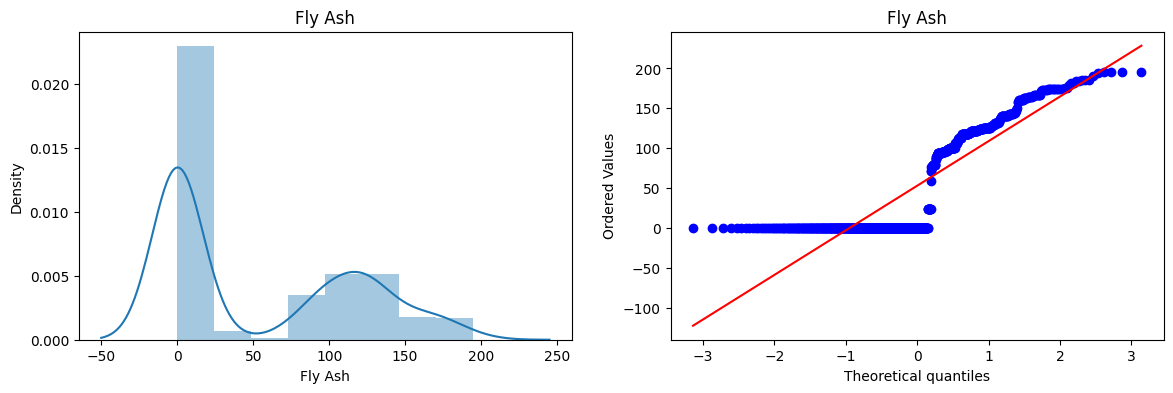

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


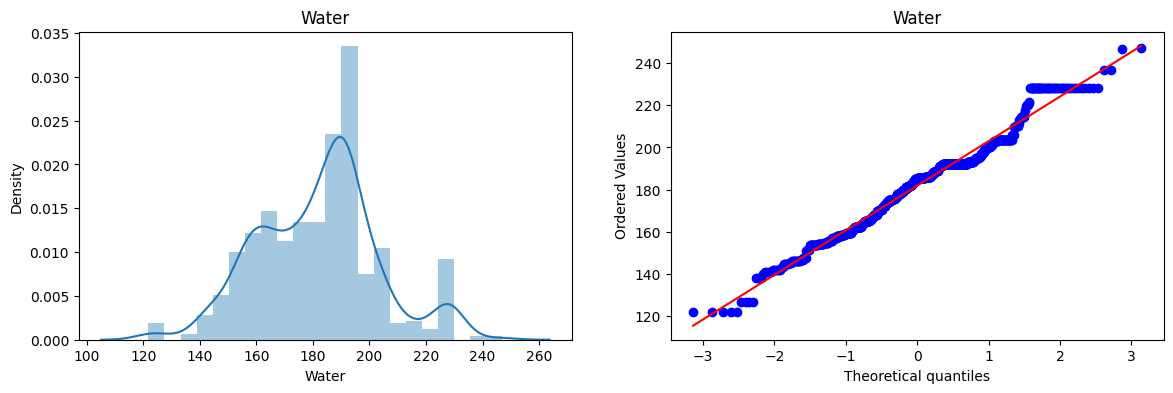

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


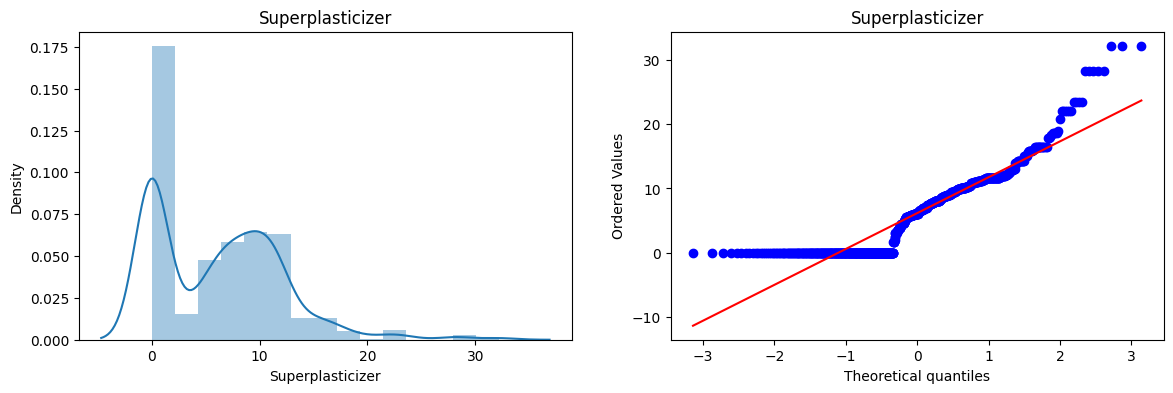

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


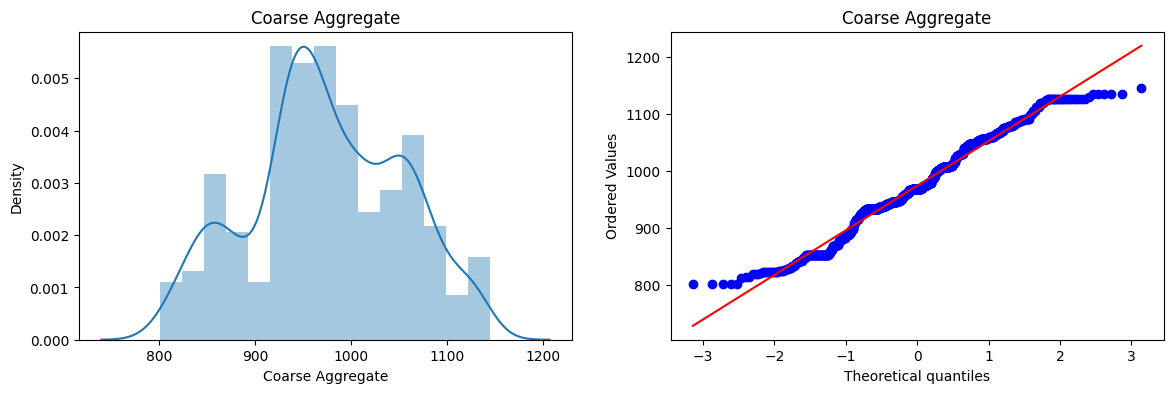

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


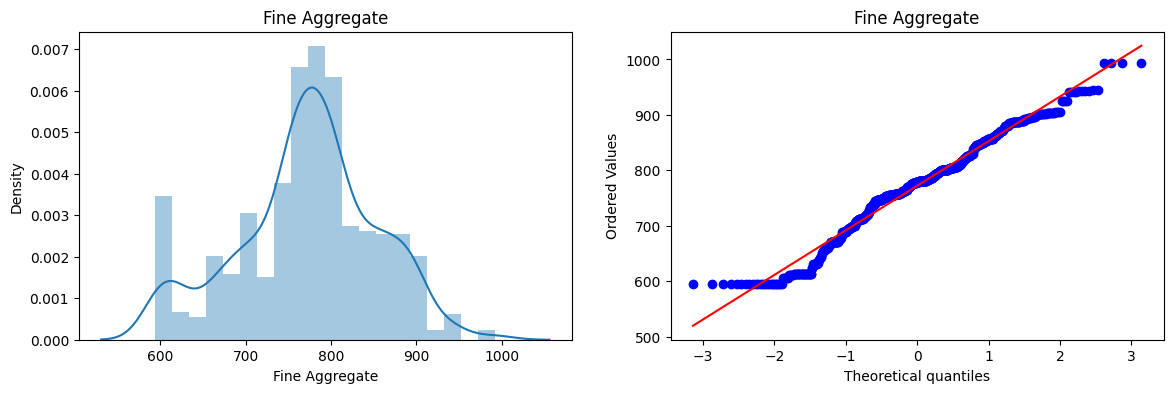

<ipython-input-48-1c6ff9d72a17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


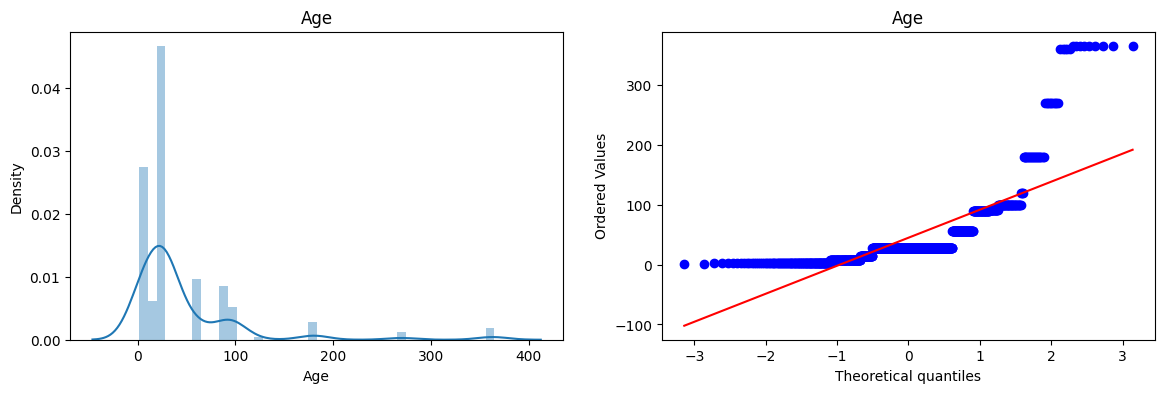

In [ ]:
# plotting the distplots without any transformation
for col in X_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train[col], dist="norm",plot=plt)
  plt.title(col)

  plt.show()


In [ ]:
# Applying Box-Cox transform

pt= PowerTransformer(method='box-cox')
# we are adding 0.00001 because some of value is 0 which can not be implemented in box-cox
X_train_transformed = pt.fit_transform(X_train+0.00001)
X_test_transformed = pt.transform(X_test+0.00001)
# give the lambdas of all
pd.DataFrame({'cols':X_train.columns, 'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772682
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [ ]:
# applying linear regression on transformed data
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred=lr.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.8054599368808216

In [ ]:
# Using CV score
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.00001)
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6668489643128354

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


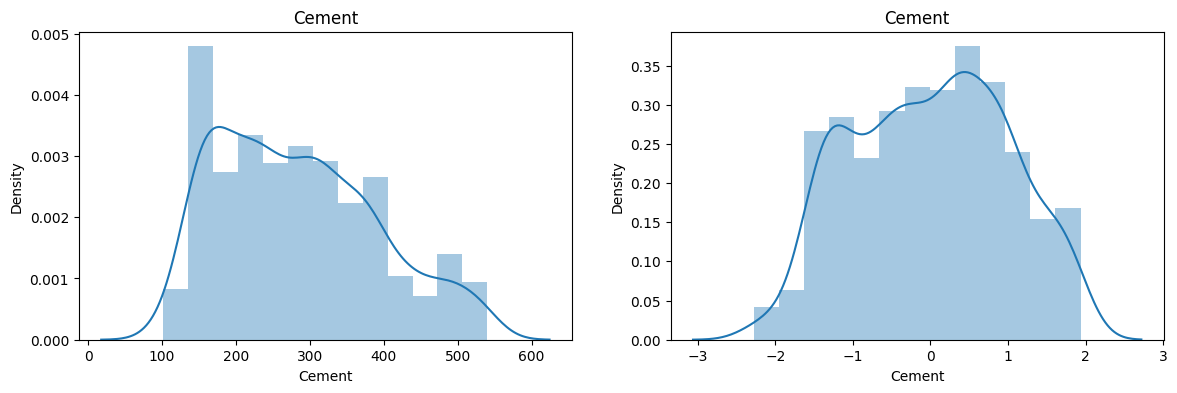

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


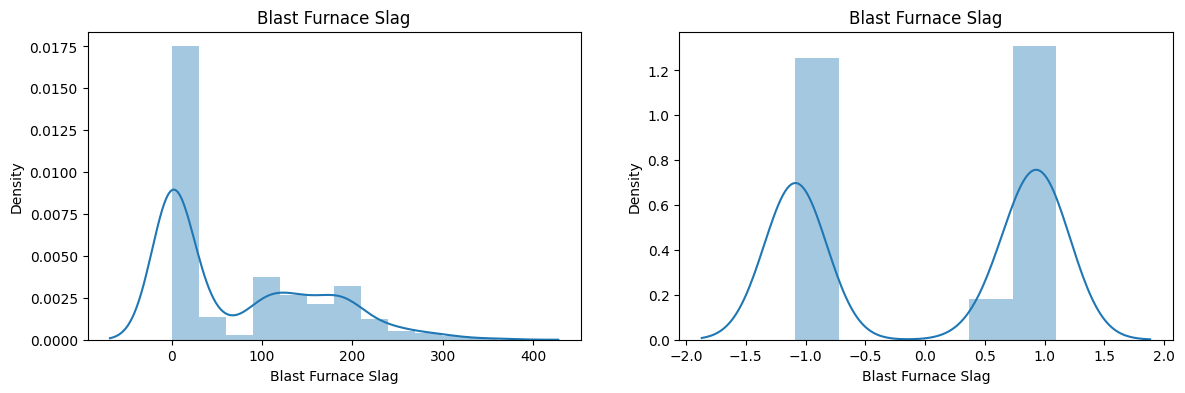

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


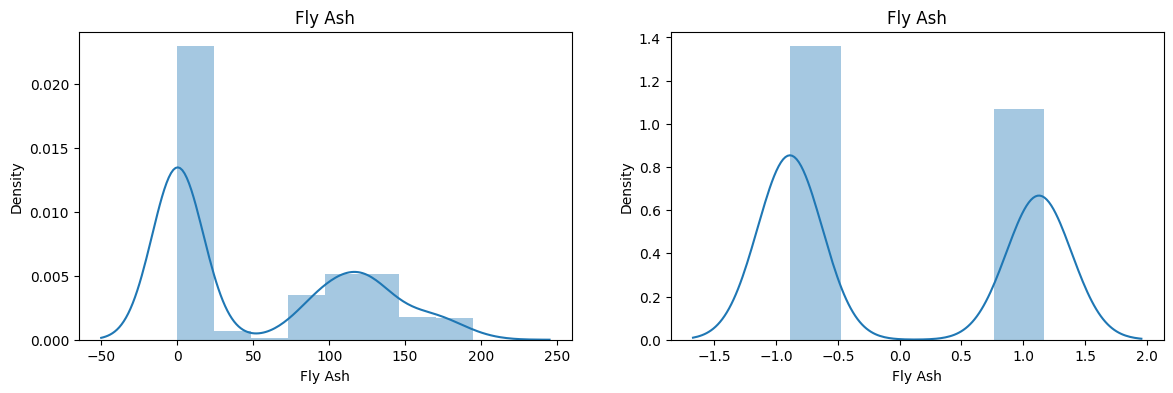

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


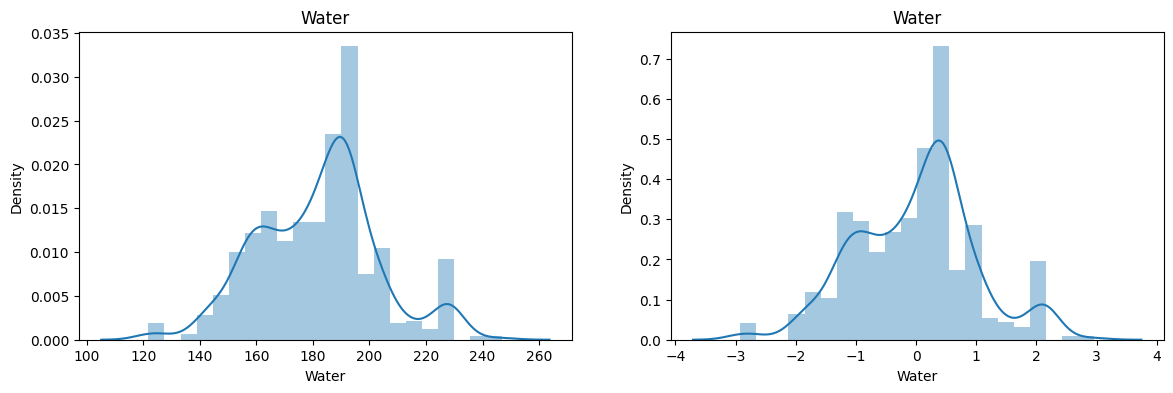

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


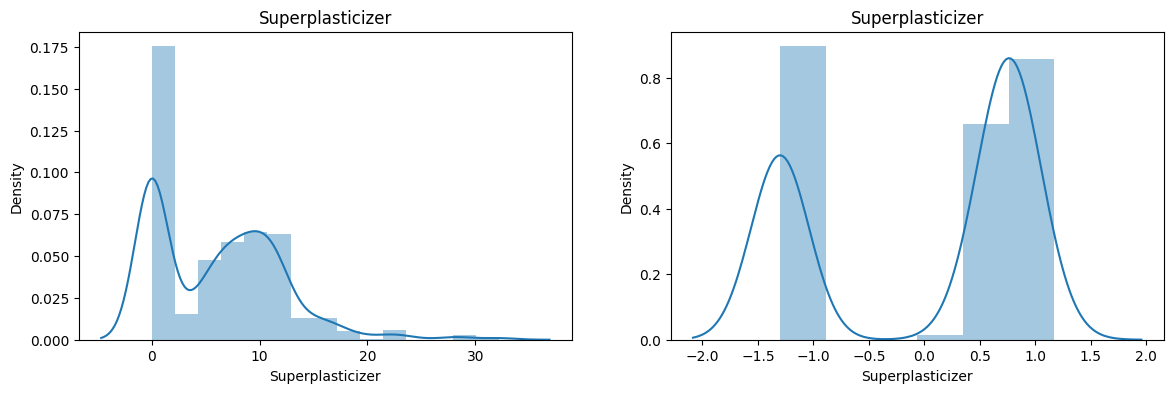

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


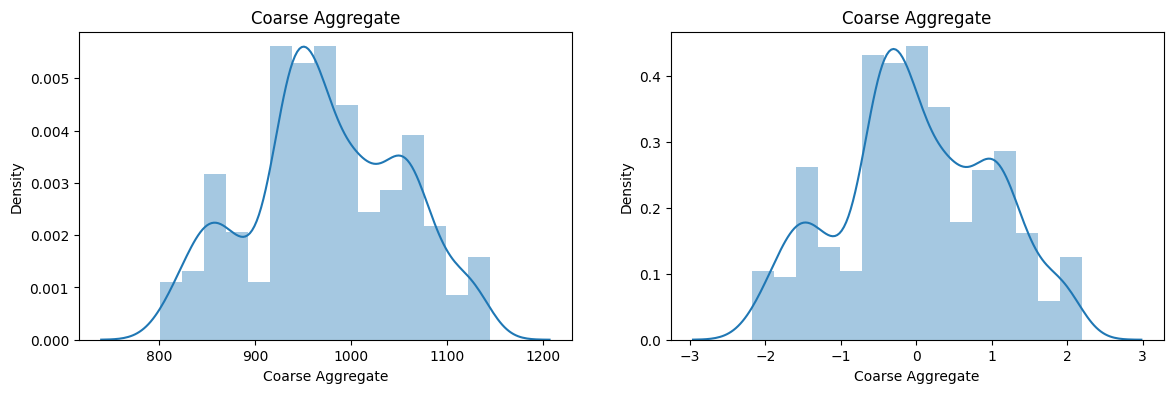

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


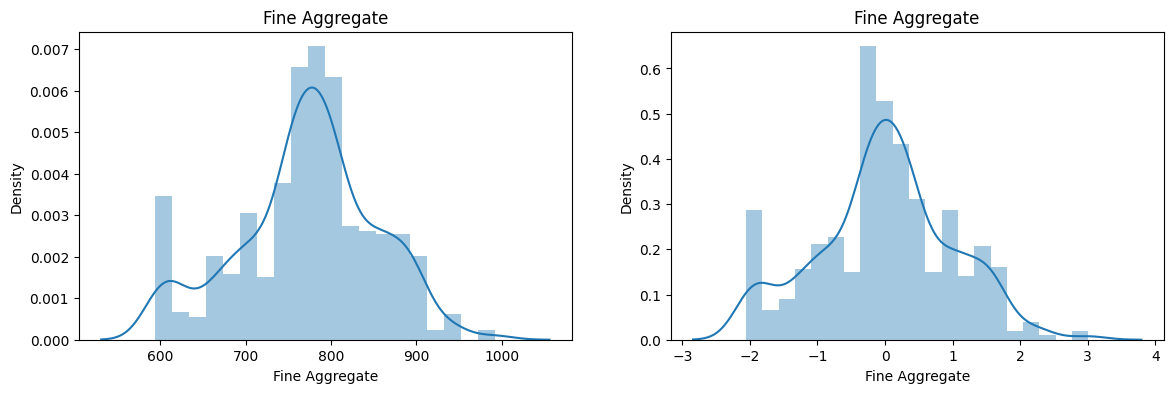

<ipython-input-56-cf029eab1675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-56-cf029eab1675>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


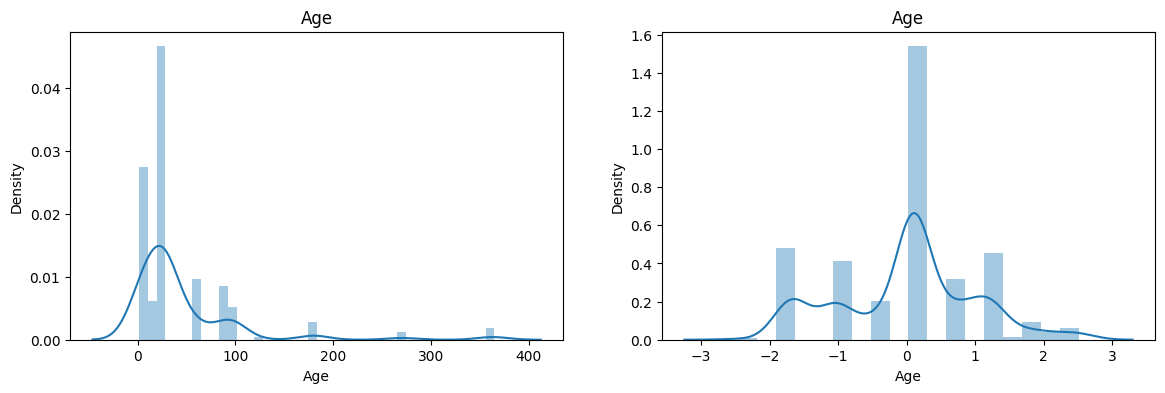

In [ ]:
# before and after comparision for Box-Cox plot
#changing numpy to df
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(X_train_transformed[col])
  plt.title(col)

  plt.show()

In [ ]:
# apply yeo-johnson transform
#by default also yeo-johnson
pt1 =PowerTransformer(method='yeo-johnson')
X_train_transformed = pt1.fit_transform(X_train)
X_test_transformed = pt1.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)
print(r2_score(y_test,y_pred))
pd.DataFrame({'cols':X_train.columns, 'yeo_johnson_lambdas':pt1.lambdas_})

0.8161906512004999


,cols,yeo_johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [ ]:
# cv score
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X)
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6834625141500866

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


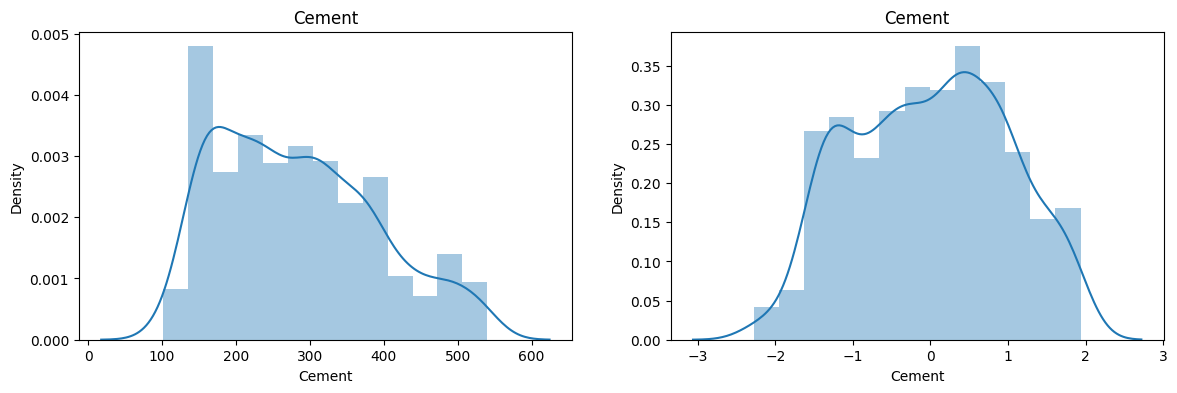

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


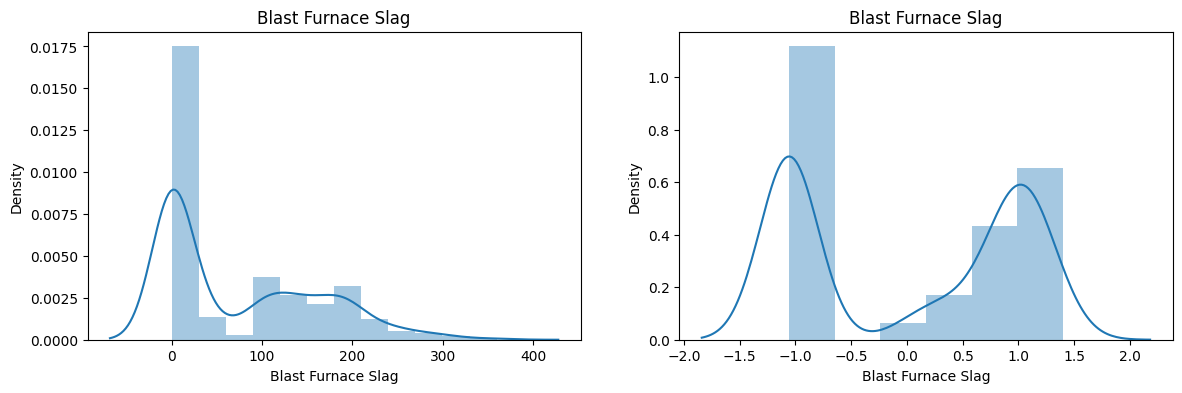

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


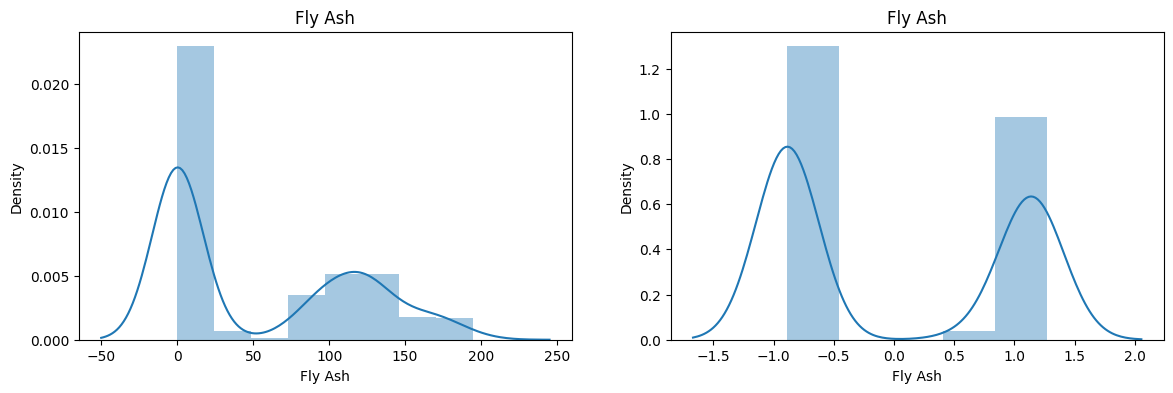

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


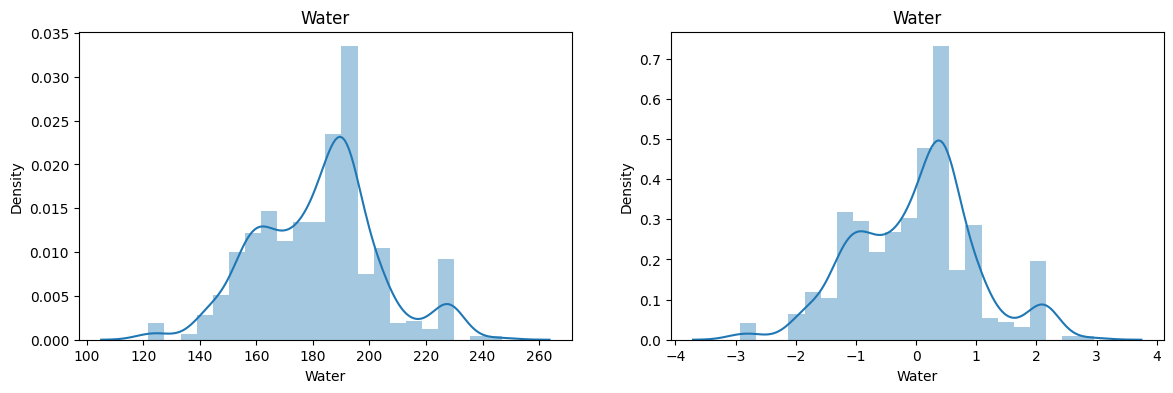

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


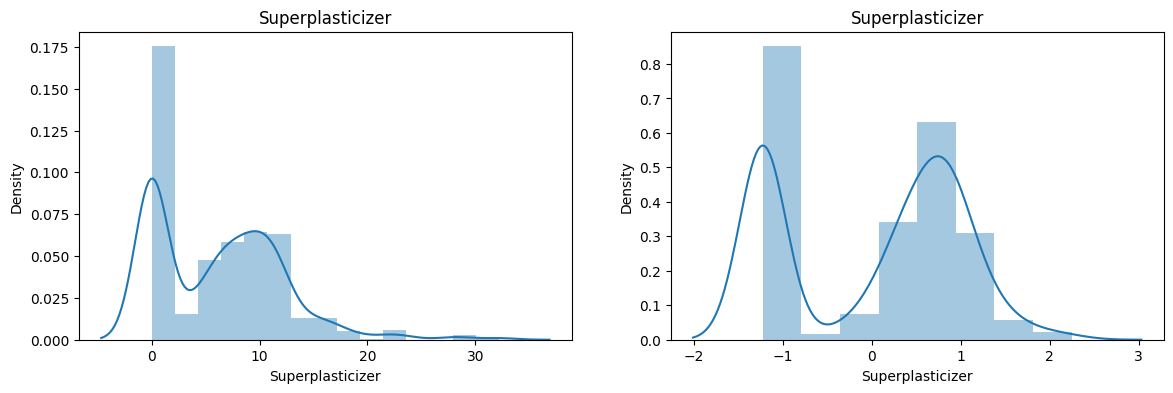

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


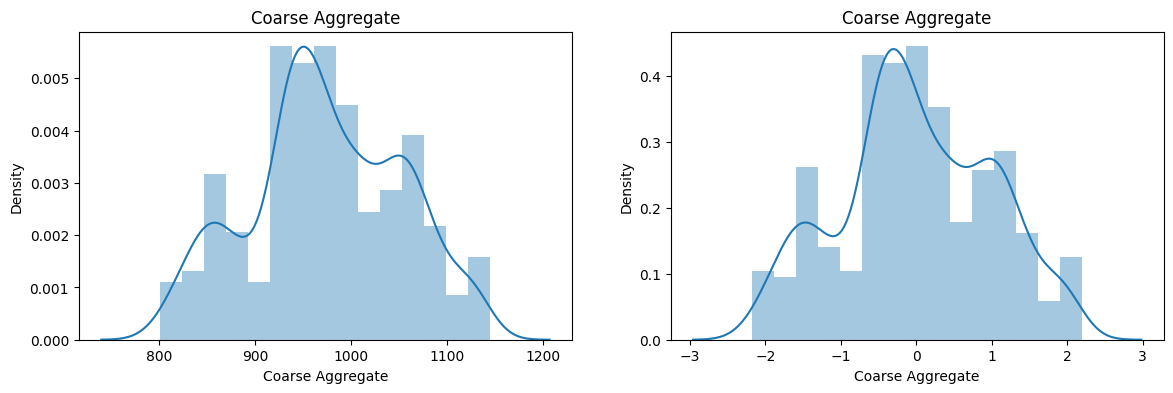

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


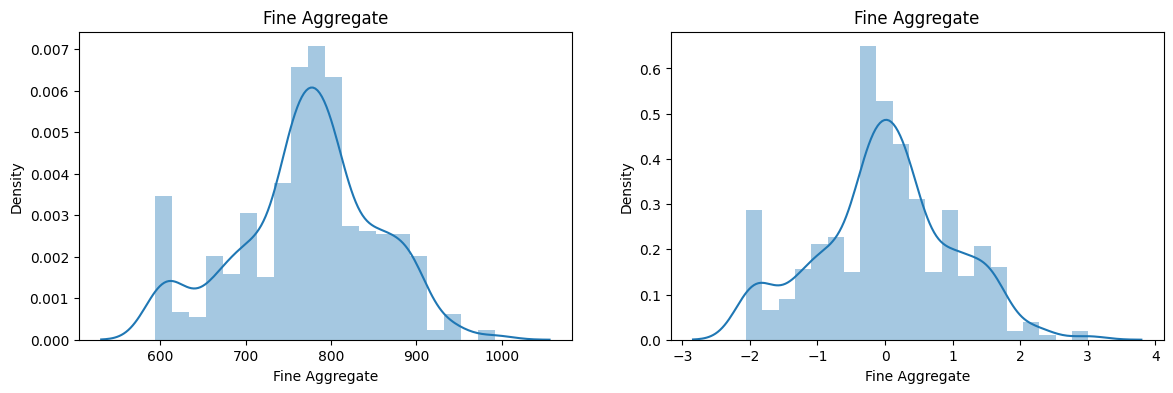

<ipython-input-60-0753103f1d51>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-60-0753103f1d51>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


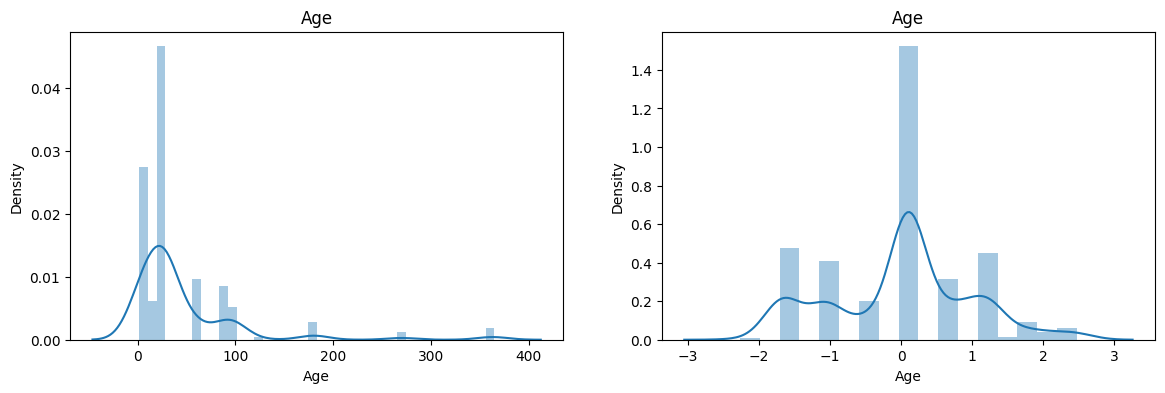

In [ ]:
#before and after yeo-johnson
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train_transformed.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(X_train_transformed[col])
  plt.title(col)

  plt.show()

## Binning and binarization:

Convert numerical to categorical value.
sometime we need to convert numerical data to categorical data in case where there is variour range of data set in huge number. so, to improve the performance we need to convert into categorical

there two way to convert
1. Discretization(binning)
2. Binarization



**Binning**
the process of transforming continuous variables by creating a set of contiguous intervals that span the range of the variable's values. Discretzation is also binning, where bin is an alternative name for interval

converting into intervals

use:
- to handle outliers
- to improve the value spread(uniform)

outlier may come under some interval. so inside the internval all have same value.

type of binning:

1. Unsupervised binning
2. supervised binning

custom binning



### Unsupervised binning
 - equal width (uniform)
 - equal frequency (quantile)
 - kmeans binning

**equal width/uniform binning**
 first we need to decide the bins(no of interval), then
 ```interval width = (max value-min value)/ bins```
 so, this can be use for handling outliers and the it doesnot effect spread

**equal frequency (quantile)**
first we need to decide the bins,
then it will divide according to quantiles

for eg if bins= 10 then each interval contains 10% of total observation. if 0-16 be the 10% of data then this is interval 1 , 16- 24 = 10% of data then this is second interval and so on

this is better than equal width because
it is perform good with outliers and value spread is uniform


**kmeans binning**

It is a clustering alogrithm. In this alog interval is called centeriod. calculate the distance of each point to the centeriod. and make a cluster with closer centeriod. then we take mean with the cluster and now means will become new centeriod and again we calculate distance of each point with centriods and make cluster with the closest centeriod . this happen untill step before and now doesnot change at all



```
KBinsDiscretizer(n_bins, strategy, encoding(odinal or OHE))
```

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('train.csv')[['Age','Fare','Survived']]
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [ ]:
df.dropna(inplace=True) # drop missing value

In [ ]:
df.shape

(714, 3)

In [ ]:
X = df.iloc[:, :2]
y = df.iloc[:, 2:]

In [ ]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [ ]:
clf= DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6293706293706294

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6275039123630674

**After using transform**

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')
kbin_fare = KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')

In [ ]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [ ]:
trf.named_transformers_['first'].n_bins_

array([10])

In [ ]:
#range that bins create
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [ ]:
# create df
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [ ]:
output['age_labels'] = pd.cut(output['age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(output['fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [ ]:
output.head()

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,5.0,20.5250,5.0,"(28.5, 32.0]","(15.75, 26.0]"
73,26.0,4.0,14.4542,4.0,"(25.0, 28.5]","(13.0, 15.75]"
253,30.0,5.0,16.1000,5.0,"(28.5, 32.0]","(15.75, 26.0]"
719,33.0,6.0,7.7750,1.0,"(32.0, 36.0]","(7.75, 7.896]"
666,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"


In [ ]:
clf= DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred=clf.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [ ]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.682140062597809

In [ ]:
# using fun
import matplotlib.pyplot as plt

def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6289514866979655


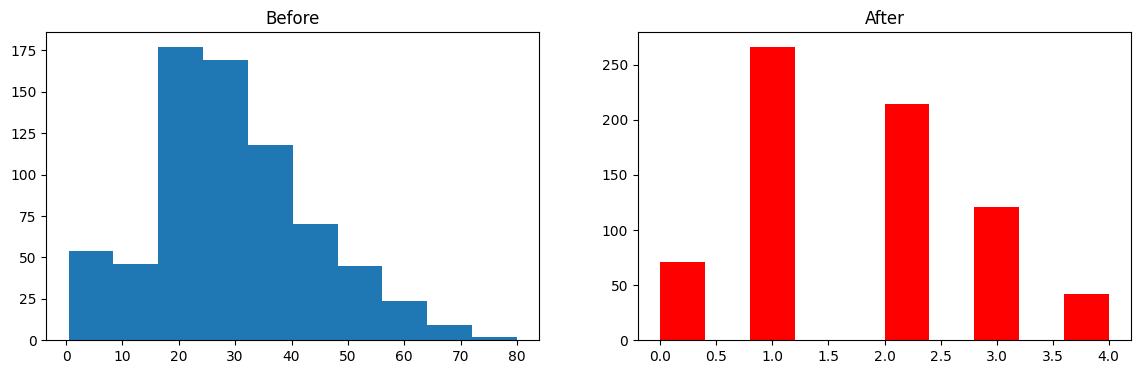

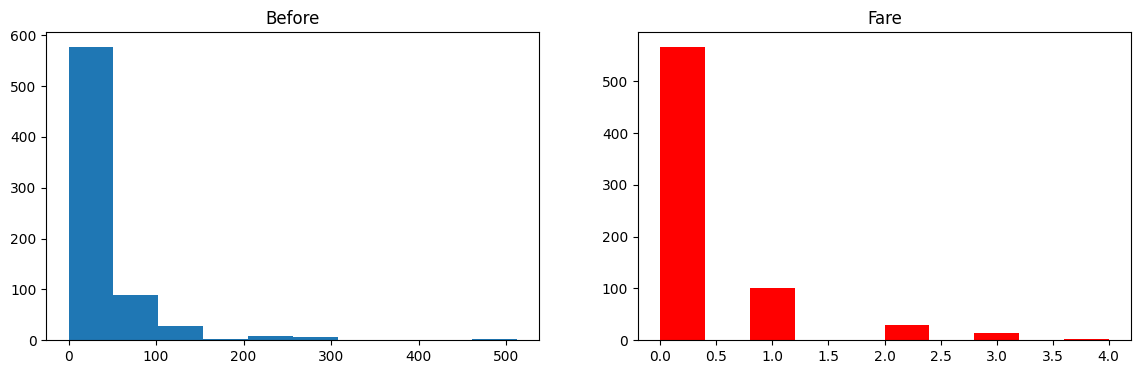

In [ ]:
#calling function
discretize(5,'kmeans')

### supervise binning
  - decision treee binning

### Binarization:
continous value is change to binary(0,1)

 if you are voter then:

 age>18 = 0 or 1


threshold = threshold value,

copy= create new col or change in same col

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]
df.dropna(inplace=True)
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [ ]:
#add sibsp and parch
df['family']=df['SibSp']+df['Parch']
df.head()

,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [ ]:
df.drop(columns=['SibSp','Parch'],inplace=True)
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [ ]:
# binarizer have family or not
from sklearn.preprocessing import Binarizer
trf = ColumnTransformer([
    ('bin', Binarizer(threshold=0, copy=False),['family'])
],remainder='passthrough')

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [ ]:
# since it has convert to numpy so we need to conver back to pd
X_transform_bina =pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])
X_transform_bina.head()

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000


#Feature Construction
creating feature manually which are not their. so, it work better

create by add sub etc  of two or more col or studying col and create new col

# Feature Selection
only selective feature or col is given to model. So, it do better



#Feature Extraction
from given feature, creating different new features doing programmatically using algo. So it do better

For EG: if we have rooms and washroom as input and we need to predict the price. but, we can only choose one feature. For this we can add area of room and washroom since both are providing the area. By this now we can use new different col 'area' as one feature to predict the price

PCA = change into high dimension and make completely new feature

LDA

tsna

# Pipeline
Pipleline chains together multiple steps so that the output of each step is used as input to the next step

-make it easy to apply the same preprocessing to train and test

### without pipeline

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # missing data
from sklearn.preprocessing import OneHotEncoder # cate data
from sklearn.preprocessing import MinMaxScaler # scaling
from sklearn.tree import DecisionTreeClassifier # prediction

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# drop some item
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)


In [ ]:
# first we need to take care of null values
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
X_train[['Embarked']].value_counts()

,count
Embarked,
S,525
C,125
Q,60


In [ ]:
si_age = SimpleImputer() # simpleImputer default is mean, we fill by taking mean
si_embarked = SimpleImputer(strategy='most_frequent') # here we use fill with most frequemt data on that col

X_train_age = si_age.fit_transform(X_train[['Age']])
X_train_embarked = si_embarked.fit_transform(X_train[['Embarked']])


#since it is alreasy train so we need to use transform only
X_test_age = si_age.transform(X_test[['Age']])
X_test_embarked = si_embarked.transform(X_test[['Embarked']])

In [ ]:
X_train_embarked[3:7]


array([[1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1.]])

In [ ]:
# one hot encoding sex and embarked
# handle_unknown = ignore mean if in test we got new cate value then we just ignore it
ohe_sex = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
#put data from the solving missing value
X_train_embarked = ohe_embarked.fit_transform(X_train_embarked)

X_test_sex = ohe_sex.transform(X_test[['Sex']])
X_test_embarked = ohe_embarked.transform(X_test_embarked)


In [ ]:
# we have alreday 3 col (age, sex, embarked)
# so we only remaining
X_train_rem = X_train.drop(columns=['Age','Embarked','Sex'])
X_test_rem = X_test.drop(columns=['Age','Embarked','Sex'])

In [ ]:
# add all col
X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked),axis=1)

In [ ]:
clf= DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test_transformed)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.776536312849162

In [ ]:
# export the model
import pickle
#if user select the category it need to convert
#to numerical form by OHE so model can understand
# this model ohe_sex will automatically convert to OHE
# so clf.pkl model can understand and predict
pickle.dump(ohe_sex,open('/content/ohe_sex.pkl','wb'))
#same
pickle.dump(ohe_embarked,open('/content/ohe_embarked.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [ ]:
# now use the predict model
import pickle
# load the exported model to this variable
ohe_sex = pickle.load(open('ohe_sex.pkl','rb'))
ohe_embarked= pickle.load(open('ohe_embarked.pkl', 'rb'))
clf = pickle.load(open('clf.pkl','rb'))

In [ ]:
# for eg:user input
# pclass/gender/age/sibsp/parch/fare/embarked
test_input= np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype= object).reshape(1,7)

In [ ]:
test_input

array([[2, 'male', 31.0, 0, 0, 10.5, 'S']], dtype=object)

In [ ]:
test_input_age= test_input[:,2].reshape(1,1)
test_input_age

In [ ]:
# coverting to OHE
# it select 2nd index value of array 'male'
test_input_sex = ohe_sex.transform(test_input[:,1].reshape(1,1))
test_input_sex


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [ ]:
test_input_embarked = ohe_embarked.transform([test_input[: ,-1]]).reshape(1,1)

In [ ]:
# add the value
test_input_transformed = np.concatenate((test_input[:,[0,3,4,5]],test_input_age,test_input_sex,test_input_embarked),axis=1)

In [ ]:
clf.predict(test_input_transformed)

### with pipeline

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # missing data
from sklearn.preprocessing import OneHotEncoder # cate data
from sklearn.preprocessing import MinMaxScaler # scaling
from sklearn.tree import DecisionTreeClassifier # prediction
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2


In [ ]:
df=pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now the plan is:
1. missing value solve
2. OHE
3. scaling
4. feature selection
5. train model

in serier one output becomes input of other

In [ ]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [ ]:
y_train.sample(5)

,Survived
173,0
71,0
142,1
463,0
169,0


In [ ]:
#imputaion transformer
trf1 = ColumnTransformer([
    # no name of col beacause it will become array after each compution
    # it work good at numpy and df
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough') # other col works as it is
#encoding
#sex comes at 1 index and embarked comes at 6 index
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

#scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

#feature selection
trf4 = SelectKBest(score_func=chi2,k=8)
#train the model
trf5 = DecisionTreeClassifier()

In [ ]:
# create by Pipeline
pipe =Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

#alternative by make_pipeline
# this doesnot requried naming of stage
#pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)


In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7a3055e86c20>)),
                ('trf5', DecisionTreeClassifier())])

In [ ]:
# explore pipe
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x7a3055e86c20>),
 'trf5': DecisionTreeClassifier()}

In [ ]:
y_pred = pipe.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

In [ ]:
#  CV using pipeline
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()

0.6391214419383433

In [ ]:
# hyperparameter tuning
#gridsearahCV
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv=5,scoring='accuracy')

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7a3055e86c20>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [ ]:
grid.best_estimator_

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7a3055e86c20>)),
                ('trf5', DecisionTreeClassifier(max_depth=2))])

In [ ]:
grid.best_score_

0.6391214419383433

In [ ]:
grid.best_params_

{'trf5__max_depth': 2}

In [ ]:
#Export the pipeline
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

Using exported pipe

In [ ]:
pipe= pickle.load(open('/content/pipe.pkl','rb'))

In [ ]:
test_input2 = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype= object).reshape(1,7)

In [ ]:
pipe.predict(test_input2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([0])